In [9]:
from IPython.display import Image

# 1 자동 미분

## 1.1 언제나 그렇듯 import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2022-11-28 17:30:54.026557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 17:30:54.130167: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-28 17:30:54.635836: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-28 17:30:54.635888: W tensorflow/compiler/xla/strea

## 1.2 오늘의 대상은 2차함수
## 1.3 그래프

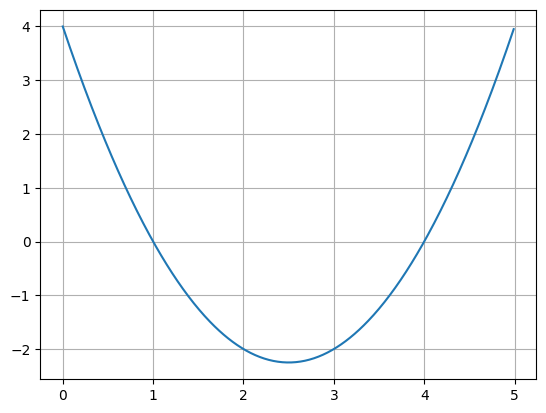

In [3]:
t = np.arange(0, 5, 0.01)
plt.plot(t, (t-1)*(t-4))
plt.grid()
plt.show()

## 1.4 이걸 tensor로 선언하면

In [4]:
x = tf.Variable(2.5)
y = (x-1)*(x-4)

y

2022-11-28 17:31:23.690389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:31:23.695649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:31:23.696069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:31:23.696952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

<tf.Tensor: shape=(), dtype=float32, numpy=-2.25>

## 1.5 미분을 하고 싶으면 GradientTape을 사용

In [5]:
with tf.GradientTape() as tape:
    y = (x-1)*(x-4)

## 1.6 미분 결과를 얻고 싶으면

## 1.7 이렇게

In [6]:
dy_dx = tape.gradient(y, x)
print(dy_dx)
print(dy_dx.numpy())

tf.Tensor(0.0, shape=(), dtype=float32)
0.0


## 1.8 Chain Rule을 아시나요?

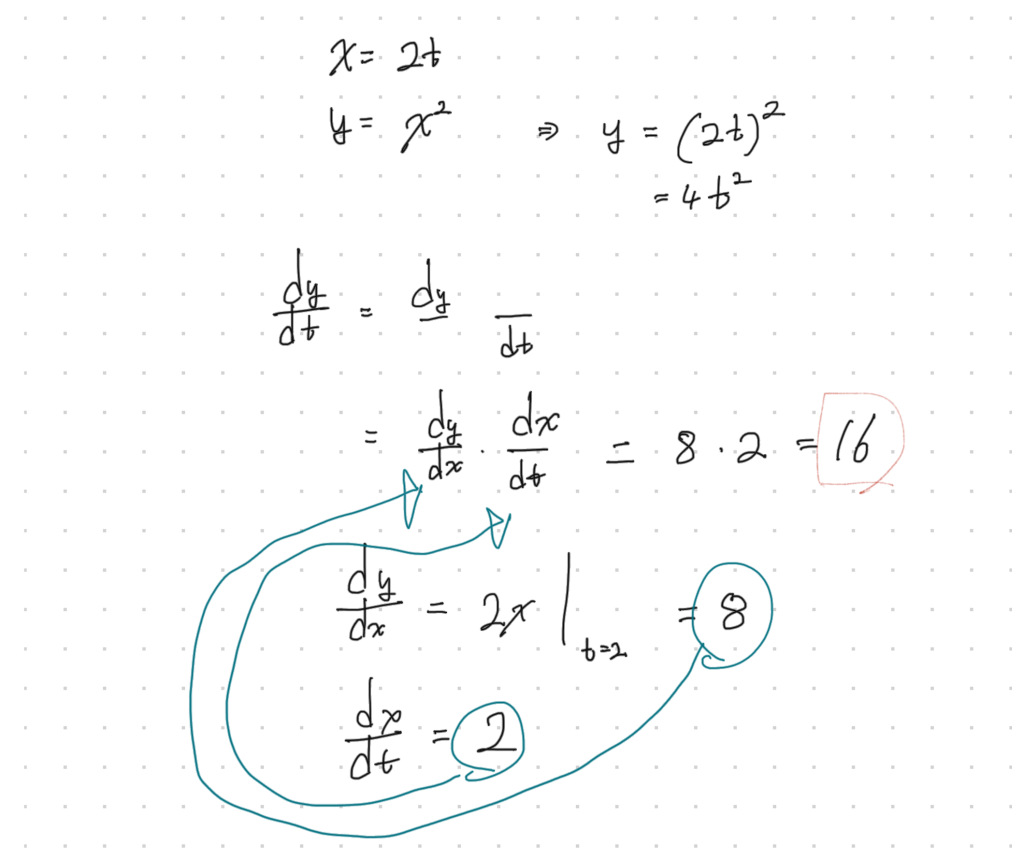

In [10]:
Image('./tensorG1.png')

## 1.9 이것도 시작합시다

In [11]:
t = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    x = 2*t
    y = x**2

- 이 때 persistent옵션은 tape을 여러번 쓰기 위해서

## 1.10 결과

In [12]:
tape.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [13]:
tape.gradient(y, t)

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>